In [100]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split

In [50]:
# Fetch historical BTC-USD data from Yahoo Finance
data = yf.download('BTC-USD', start='2020-04-08', end='2025-04-08')


[*********************100%***********************]  1 of 1 completed


In [49]:

# Display the first few rows of the data
print(data.head())

Price             Close         High          Low         Open       Volume
Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD      BTC-USD
Date                                                                       
2020-04-08  7334.098633  7356.223633  7153.305664  7179.283203  37563249549
2020-04-09  7302.089355  7341.448242  7179.094238  7337.966309  34815139178
2020-04-10  6865.493164  7303.815430  6802.475098  7303.815430  43622840992
2020-04-11  6859.083008  6926.069824  6789.920898  6867.440430  31222085946
2020-04-12  6971.091797  7119.947266  6811.078125  6858.067871  35759567632


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2020-04-08 to 2025-04-06
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   1825 non-null   float64
 1   (High, BTC-USD)    1825 non-null   float64
 2   (Low, BTC-USD)     1825 non-null   float64
 3   (Open, BTC-USD)    1825 non-null   float64
 4   (Volume, BTC-USD)  1825 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 85.5 KB


In [8]:

# Preprocess the data
# Ensure the data is sorted by date
data = data.sort_index()

In [54]:
# checking for the null value
data.isnull().sum()

,,0
Price,Ticker,
Close,BTC-USD,0
High,BTC-USD,0
Low,BTC-USD,0
Open,BTC-USD,0
Volume,BTC-USD,0


In [9]:
# Handle missing values (if any)
data = data.fillna(method='ffill')  # Forward fill to handle missing values


<ipython-input-9-08a274e5b4cb>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Forward fill to handle missing values


In [69]:

# Split the data into features (X) and target (y)
# For simplicity, let's use 'Close' price as the target
X = data.drop(columns=['Close'])
y = data['Close']

In [70]:

# Perform an 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [71]:
# Display the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1460, 4)
X_test shape: (365, 4)
y_train shape: (1460, 1)
y_test shape: (365, 1)


In [72]:

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))



In [73]:


# Reshape data for LSTM [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))



In [74]:


# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [75]:

model.compile(optimizer='adam', loss='mean_squared_error')

In [76]:

# Train the model
model.fit(X_train_reshaped, y_train_scaled, epochs=50, batch_size=32)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1015
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.1986e-04
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.0098e-04
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2297e-04
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6347e-04
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9430e-04
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.7714e-04
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6748e-04
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8146e-04
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8156e-04
Epoch 12/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6213e-04
Epoch 13/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5068e-04
Epoch 14/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7655e-04
Epoch 15/50
46/46 ━━━━━━━━━━━━━━━━━━━

In [77]:
# Make predictions
y_pred_scaled = model.predict(X_test_reshaped)
y_pred = scaler.inverse_transform(y_pred_scaled)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [78]:

# Evaluate the model
mae = np.mean(np.abs(y_pred - y_test.values.reshape(-1, 1)))
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 1482.0126819349316


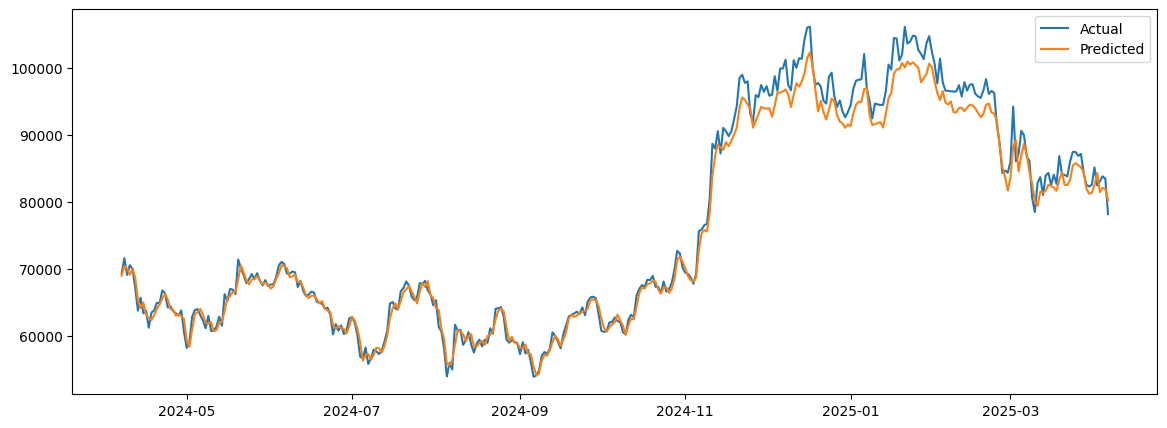

In [99]:

# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.legend()
plt.show()

In [96]:
# Prepare input data for future prediction
# Use the last sequence from the test set as the starting point for future prediction
future_input = X_test_reshaped[-1].reshape(1, X_test_reshaped.shape[1], 1)

In [97]:
# Predict future prices
future_predictions = []
time_steps = 30  # Number of future time steps to predict
for i in range(time_steps):
    prediction = model.predict(future_input)
    future_predictions.append(prediction[0, 0])
    # Update the input data by shifting one step forward
    future_input = np.roll(future_input, -1, axis=1)
    future_input[0, -1, 0] = prediction



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


<ipython-input-97-9a01dae698bc>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_input[0, -1, 0] = prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [98]:

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))


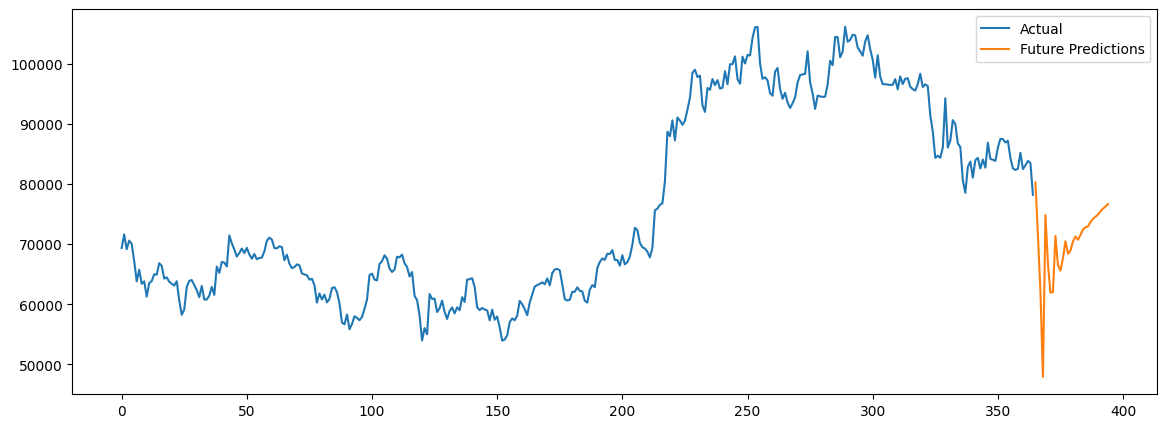

In [95]:
# Plot the future predictions
plt.figure(figsize=(14, 5))
plt.plot(range(len(y_test)), y_test, label='Actual')
plt.plot(range(len(y_test), len(y_test) + time_steps), future_predictions, label='Future Predictions')
plt.legend()
plt.show()
